# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

C:\Users\Agu\AppData\Local\Temp\ipykernel_18460\1501482610.py:3: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy import misc, ndimage


# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

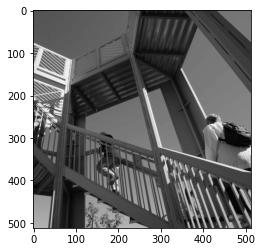

In [3]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

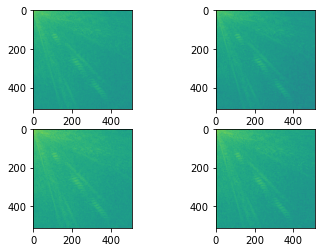

In [4]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

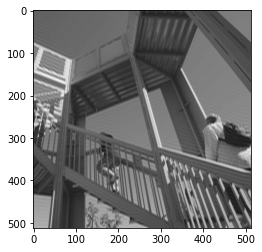

In [6]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

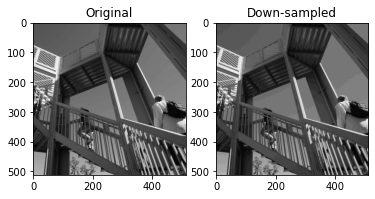

In [7]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

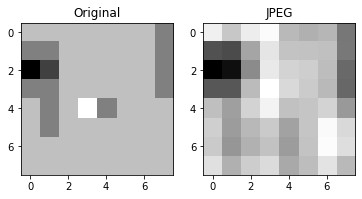

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [9]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr).

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

# REZOLVARI

# EX 1

In [1]:
import numpy as np
from scipy.fft import dctn, idctn

Q_jpeg = np.array([
 [16,11,10,16,24,40,51,61],
 [12,12,14,19,26,58,60,55],
 [14,13,16,24,40,57,69,56],
 [14,17,22,29,51,87,80,62],
 [18,22,37,56,68,109,103,77],
 [24,35,55,64,81,104,113,92],
 [49,64,78,87,103,121,120,101],
 [72,92,95,98,112,100,103,99]
], dtype=np.float32)

def jpeg_compress_grayscale(img, Q_jpeg=Q_jpeg):
    H, W = img.shape

    # padding 
    Hpad = (8 - (H % 8)) % 8
    Wpad = (8 - (W % 8)) % 8
    img_p = np.pad(img, ((0,Hpad),(0,Wpad)), mode='edge').astype(np.float32)

    H2, W2 = img_p.shape
    rec = np.zeros_like(img_p)
    quantized_blocks = []

    for i in range(0, H2, 8):
        for j in range(0, W2, 8):
            block = img_p[i:i+8, j:j+8]
            block_shift = block - 128.0

            C = dctn(block_shift)
            Cq = np.round(C / Q_jpeg)
            quantized_blocks.append(Cq)

            Cdeq = Cq * Q_jpeg
            block_rec = idctn(Cdeq) + 128.0
    
            block_rec = np.clip(block_rec, 0, 255)
            rec[i:i+8, j:j+8] = block_rec

    rec_cropped = rec[:H, :W].astype(np.uint8)
    return rec_cropped



C:\Users\Agu\AppData\Local\Temp\ipykernel_21608\857136913.py:2: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.fft import dctn, idctn


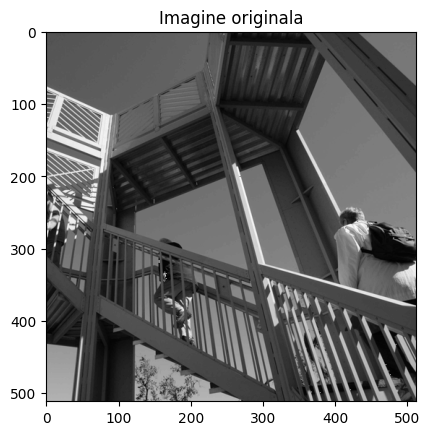

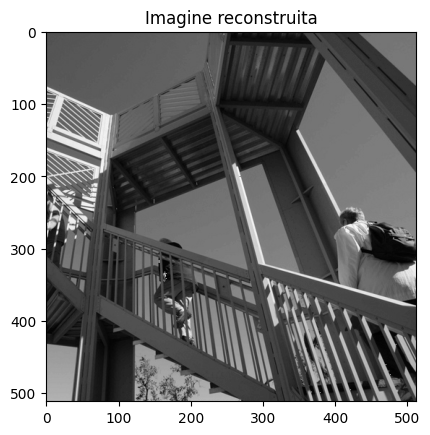

MSE: 1.06719970703125


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import ascent

# Load imaginea de test

X = ascent()  # imagine grayscale 512x512

plt.imshow(X, cmap=plt.cm.gray)
plt.title("Imagine originala")
plt.show()

rec_img = jpeg_compress_grayscale(X)

plt.imshow(rec_img, cmap=plt.cm.gray)
plt.title("Imagine reconstruita")
plt.show()

mse = np.mean((X - rec_img)**2)
print("MSE:", mse)


# EX 2

In [9]:
def rgb_to_ycbcr(img_rgb):
    arr = img_rgb.astype(np.float32)
    R = arr[...,0]
    G = arr[...,1]
    B = arr[...,2]
    Y  = 0.299*R + 0.587*G + 0.114*B
    Cb = -0.168736*R - 0.331264*G + 0.5*B + 128.0
    Cr = 0.5*R - 0.418688*G - 0.081312*B + 128.0
    return np.stack([Y, Cb, Cr], axis=-1)

def ycbcr_to_rgb(ycbcr):
    Y = ycbcr[...,0]
    Cb = ycbcr[...,1] - 128.0
    Cr = ycbcr[...,2] - 128.0
    R = Y + 1.402 * Cr
    G = Y - 0.344136 * Cb - 0.714136 * Cr
    B = Y + 1.772 * Cb
    rgb = np.stack([R,G,B], axis=-1)
    rgb = np.clip(rgb, 0, 255).astype(np.uint8)
    return rgb

def subsample_420(component):
    H, W = component.shape
    H2 = (H + 1) // 2
    W2 = (W + 1) // 2
    comp_p = np.pad(component, ((0, H % 2),(0, W % 2)), mode='edge')
    small = comp_p.reshape(H2, 2, W2, 2).mean(axis=(1,3))
    return small

def upsample_420(small, H, W):
    return np.repeat(np.repeat(small, 2, axis=0)[:H, :], 2, axis=1)[:H,:W]

def jpeg_compress_color(img_rgb, Q_Y=Q_jpeg, Q_C=None):
    if Q_C is None:
        Q_C = Q_jpeg * 2

    ycbcr = rgb_to_ycbcr(img_rgb)
    Y = ycbcr[...,0]
    Cb = ycbcr[...,1]
    Cr = ycbcr[...,2]
    H, W, _ = img_rgb.shape

    # Reducere la jumatate pe ambele dimensiuni pentru a economisi spatiu
    Cb_s = subsample_420(Cb)
    Cr_s = subsample_420(Cr)

    # Proceseaza Y la rezolutia originala; proceseaza Cb_s,Cr_s la rezolutie /2
    Y_rec= jpeg_compress_grayscale(Y.astype(np.uint8), Q_jpeg=Q_Y)
    Cb_rec_small = jpeg_compress_chroma(Cb_s, Q_C)
    Cr_rec_small = jpeg_compress_chroma(Cr_s, Q_C)

    Cb_rec = upsample_420(Cb_rec_small.astype(np.float32), H, W)
    Cr_rec = upsample_420(Cr_rec_small.astype(np.float32), H, W)
    
    rec_ycbcr = np.stack([Y_rec.astype(np.float32), Cb_rec, Cr_rec], axis=-1)
    rec_rgb = ycbcr_to_rgb(rec_ycbcr).astype(np.uint8)
    return rec_rgb

def jpeg_compress_chroma(C, Q):
    H, W = C.shape
    Hpad = (8 - H % 8) % 8
    Wpad = (8 - W % 8) % 8

    Cp = np.pad(C, ((0,Hpad),(0,Wpad)), mode='edge')
    H2, W2 = Cp.shape
    rec = np.zeros_like(Cp)

    for i in range(0, H2, 8):
        for j in range(0, W2, 8):
            block = Cp[i:i+8, j:j+8].astype(np.float32)

            C_dct = dctn(block)
            C_q = np.round(C_dct / Q)
            C_deq = C_q * Q

            block_rec = idctn(C_deq)
            rec[i:i+8, j:j+8] = block_rec

    return rec[:H, :W]


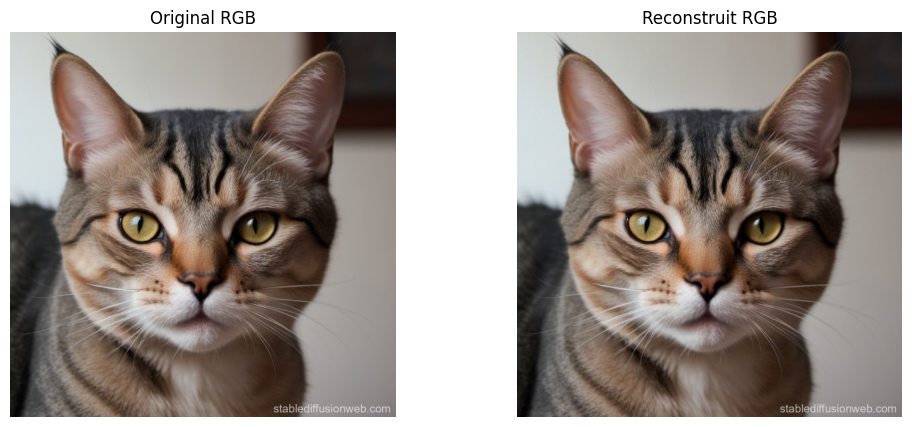

MSE reconstruit: 2.76060422261556


In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open("imagine_color.jpg")
img_rgb = np.array(img)

rec_rgb = jpeg_compress_color(img_rgb, Q_Y=Q_jpeg, Q_C=Q_jpeg*2)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original RGB")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Reconstruit RGB")
plt.imshow(rec_rgb)
plt.axis('off')

plt.show()

# Calcul MSE
mse_val = np.mean((img_rgb - rec_rgb)**2)
print("MSE reconstruit:", mse_val)


# EX 3
Folosesc cautare binara pentru a gasi un factor de scalare a matricei de cuantizare astfel incat imaginea reconstruita sa aiba MSE <= target_mse;

In [11]:
def mse(img1, img2):
    return np.mean((img1 - img2)**2)

def compress_to_mse_color(img_rgb, target_mse, max_iter=30):
    lo, hi = 0.1, 10.0
    best_rec = None
    best_scale = None
    best_mse = np.inf

    for _ in range(max_iter):
        mid = (lo + hi) / 2.0
        QY = Q_jpeg * mid
        QC = Q_jpeg * mid * 2.0
        rec = jpeg_compress_color(img_rgb, Q_Y=QY, Q_C=QC)
        curr_mse = mse(img_rgb, rec)

        if curr_mse < best_mse:
            best_mse = curr_mse
            best_rec = rec.copy()
            best_scale = mid

        if curr_mse <= target_mse:
            lo = mid
        else:
            hi = mid

        if hi - lo < 1e-3:
            break

    return best_rec, best_scale


Factorul de scalare al cuantizarii: 5.05


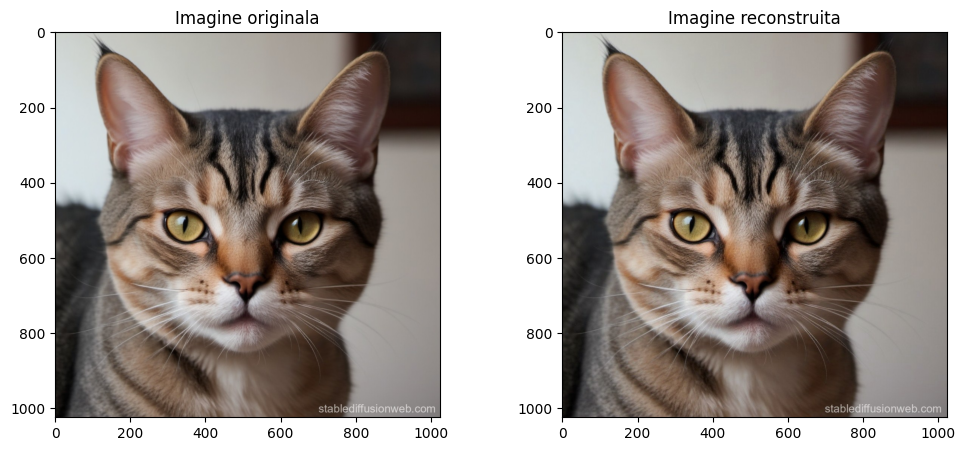

MSE: 4.868951161702474


In [12]:
import numpy as np
import matplotlib.pyplot as plt

img = Image.open("imagine_color.jpg")
img_rgb = np.array(img)

target_mse = 100

rec_rgb, best_scale = compress_to_mse_color(img_rgb, target_mse)

print("Factorul de scalare al cuantizarii:", best_scale)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Imagine originala")
plt.imshow(img_rgb)

plt.subplot(1,2,2)
plt.title("Imagine reconstruita")
plt.imshow(rec_rgb)

plt.show()

real_mse = mse(img_rgb, rec_rgb)
print("MSE:", real_mse)


# EX 4

In [16]:
def compress_video(frames, Q):
    compressed = []
    for frame in frames:
        rec = jpeg_compress_color(frame, Q_Y=Q, Q_C=Q*2)
        compressed.append(rec)
    return compressed


10 frame-uri citite


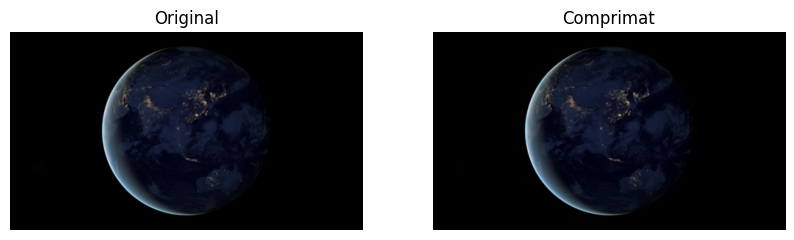

In [ ]:
import cv2
import matplotlib.pyplot as plt

video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)

frames = []
success, frame = cap.read()
while success and len(frames) < 10:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame_rgb)
    success, frame = cap.read()

cap.release()
print(f"{len(frames)} frame-uri citite")

Q_test = 50
compressed_frames = compress_video(frames, Q_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Frame original")
plt.imshow(frames[0])

plt.subplot(1,2,2)
plt.title("Frame comprimat")
plt.imshow(compressed_frames[0])
plt.show()
